# <b>Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import statsmodels.api as sm 

# <b>Reading Data

In [2]:
train = pd.read_csv(r"C:\Users\LENOVO\Desktop\coaching\Data Science\Machine Learning\datasets\titanic (train,test)\titanic_train.csv")
test = pd.read_csv(r"C:\Users\LENOVO\Desktop\coaching\Data Science\Machine Learning\datasets\titanic (train,test)\titanic_test.csv")


# <b> Data Cleaning

## ALL FUNCTIONS

In [3]:
def pre_processing(X):
    '''Process all the data for any changes or modification on the predictors'''
    
    #Missing Value
    X['Age'].fillna(28.0,inplace=True)
    X['Embarked'].fillna(X['Embarked'].mode()[0],inplace = True)
    X['Fare'].fillna(X['Fare'].mean(),inplace = True)
    
    #Conversion
    features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
    X_dummy_features = pd.get_dummies(X[features])
    
    X=pd.concat((X_dummy_features,X['Age'],X['Fare']),axis=1)
    return X

def evaluation(predictions,truth):
    return classification_report(predictions,truth)
    

## Exploring Data

### Understanding data 

In [4]:
# top 5 rows of data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# checking info and dtype of data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
## summary of categorical variables
train.describe(include = object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Allison, Miss. Helen Loraine",male,1601,C23 C25 C27,S
freq,1,577,7,4,644



### Distribution of Variables

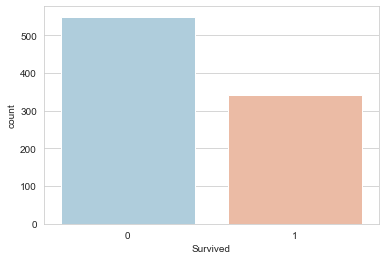

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r');

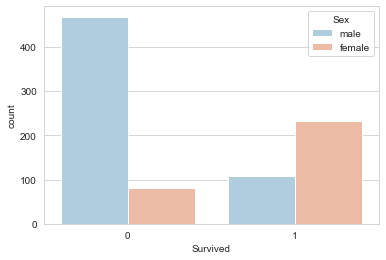

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r');

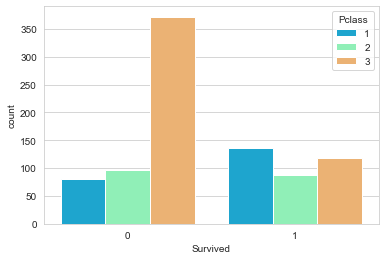

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow');

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


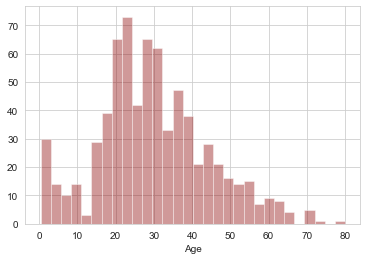

In [11]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30);

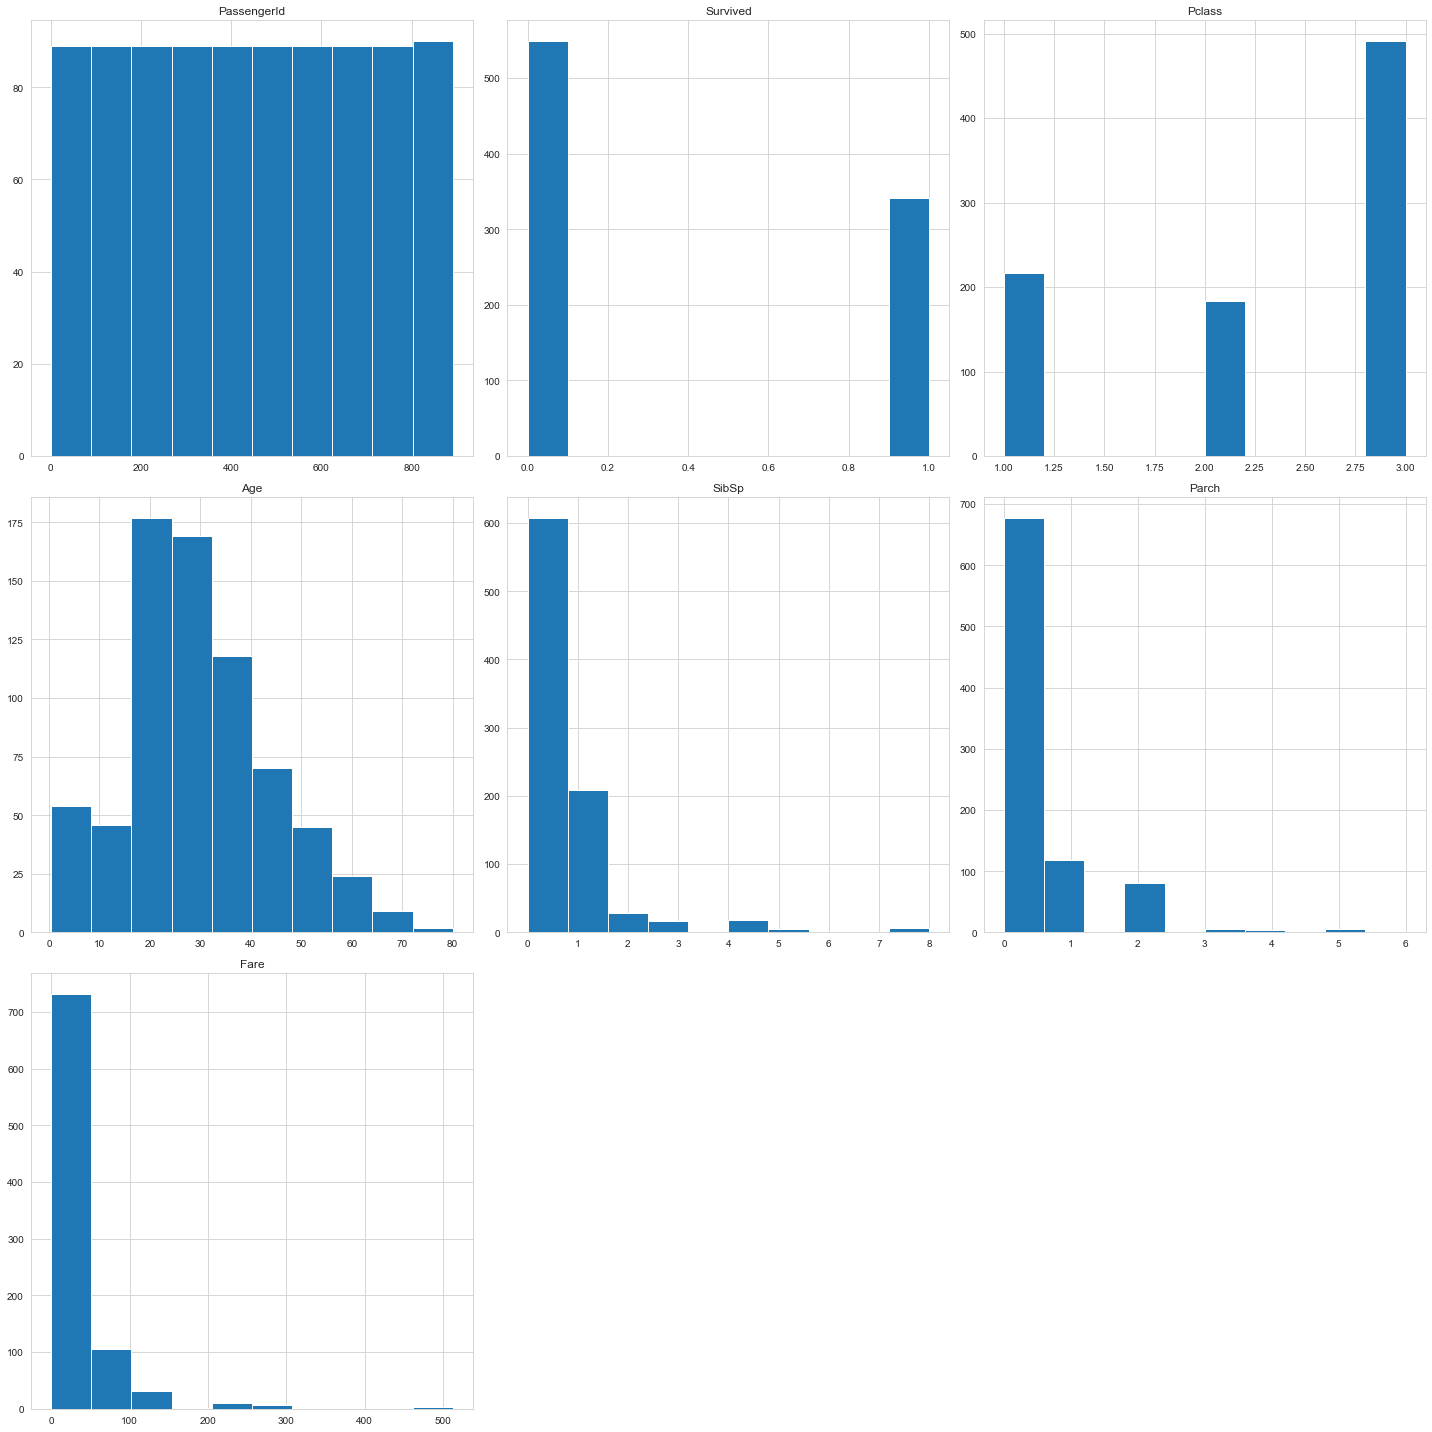

In [12]:
train.hist(figsize = (20,20));

plt.tight_layout()

### Analyzing and Treating missing values

             Total  Percentage of Missing Values     Type
Cabin          687                     77.104377   object
Age            177                     19.865320  float64
Embarked         2                      0.224467   object
Fare             0                      0.000000  float64
Ticket           0                      0.000000   object
Parch            0                      0.000000    int64
SibSp            0                      0.000000    int64
Sex              0                      0.000000   object
Name             0                      0.000000   object
Pclass           0                      0.000000    int64
Survived         0                      0.000000    int64
PassengerId      0                      0.000000    int64


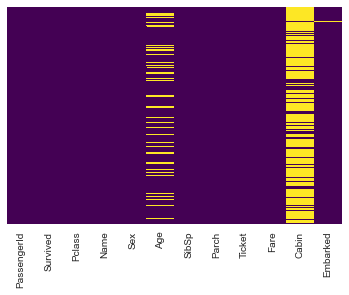

In [13]:
# Checking missing values 
Total = train.isnull().sum().sort_values(ascending = False)          
Percent = (train.isnull().sum()*100/train.isnull().count()).sort_values(ascending = False)  
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])

# add the column containing data type of each variable
missing_data['Type'] = train[missing_data.index].dtypes
print(missing_data)

#printing a heatmap
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis');

<div class="burk">
Since there are so many nan values in the cabin column we will drop it.
Age has also some missing values so we will fill the values by its mode and same for embarked.
</div><i class="fa fa-lightbulb-o "></i>

<div class="burk">
We will change the dtype of embarked to integer (for our baseline model)</div><i class="fa fa-lightbulb-o "></i>

### Using the same model and applying it on all the data i.e. train


In [14]:
y = train["Survived"] #(y_train)

# This ensures same pre processing steps are applied to both train and test sets.
X=pre_processing(train) #Training data (x_train)
test_features=pre_processing(test) # Test submission data (X_test)

rf=RandomForestClassifier(n_estimators=80, max_depth=40, random_state = 50,min_samples_leaf=8)
rf.fit(X,y)

RandomForestClassifier(max_depth=40, min_samples_leaf=8, n_estimators=80,
                       random_state=50)

### Predict on the test

#### Baseline Model

In [15]:
test['Survived']=rf.predict(test_features)

In [16]:
y_pred = rf.predict(X)

In [17]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       549
           1       0.88      0.71      0.79       342

    accuracy                           0.85       891
   macro avg       0.86      0.83      0.84       891
weighted avg       0.86      0.85      0.85       891



In [18]:
test[['PassengerId','Survived']].to_csv("./submission-1.csv",index=False)

<span class="mark">Exploring the data more and predicting
</span>

In [19]:
# fit the model with maximum likelihood function
model = sm.Logit(endog=train["Survived"], exog=X).fit()


Optimization terminated successfully.
         Current function value: 0.440810
         Iterations 6


In [20]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            8
Date:                Sun, 04 Jul 2021   Pseudo R-squ.:                  0.3380
Time:                        21:22:51   Log-Likelihood:                -392.76
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.073e-81
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -1.1008      0.144     -7.665      0.000      -1.382      -0.819
SibSp         -0.3254      0.109     -2.984      0.003      -0.539      -0.112
Parch         -0.0906      0.119     -0.765      0.4

<span class="burk">since Parch and Fare Z values are greater than P value (i.e 0.05) we will remove them from our model`</span>

In [27]:
y = train["Survived"] #(y_train)

# This ensures same pre processing steps are applied to both train and test sets.
X= pre_processing(train).drop(["Parch", "Fare"],axis = 1) #Training data (x_train)
test_features=pre_processing(test).drop(["Parch", "Fare"],axis = 1) # Test submission data (X_test)

rf=RandomForestClassifier(n_estimators=80, max_depth=40, random_state = 50,min_samples_leaf=8)
rf.fit(X,y)

RandomForestClassifier(max_depth=40, min_samples_leaf=8, n_estimators=80,
                       random_state=50)

In [22]:
test['Survived']=rf.predict(test_features)

y_pred = rf.predict(X)

print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       549
           1       0.87      0.69      0.77       342

    accuracy                           0.84       891
   macro avg       0.85      0.81      0.82       891
weighted avg       0.84      0.84      0.84       891



In [23]:
# checking coorelation

corr = train.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


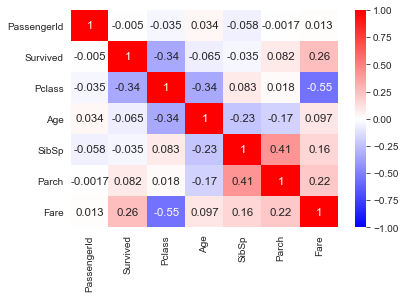

In [24]:
# plotting a heatmap
sns.heatmap(corr, annot = True, vmax = 1.0, vmin = -1.0, cmap = 'bwr', annot_kws = {"size": 11.5});

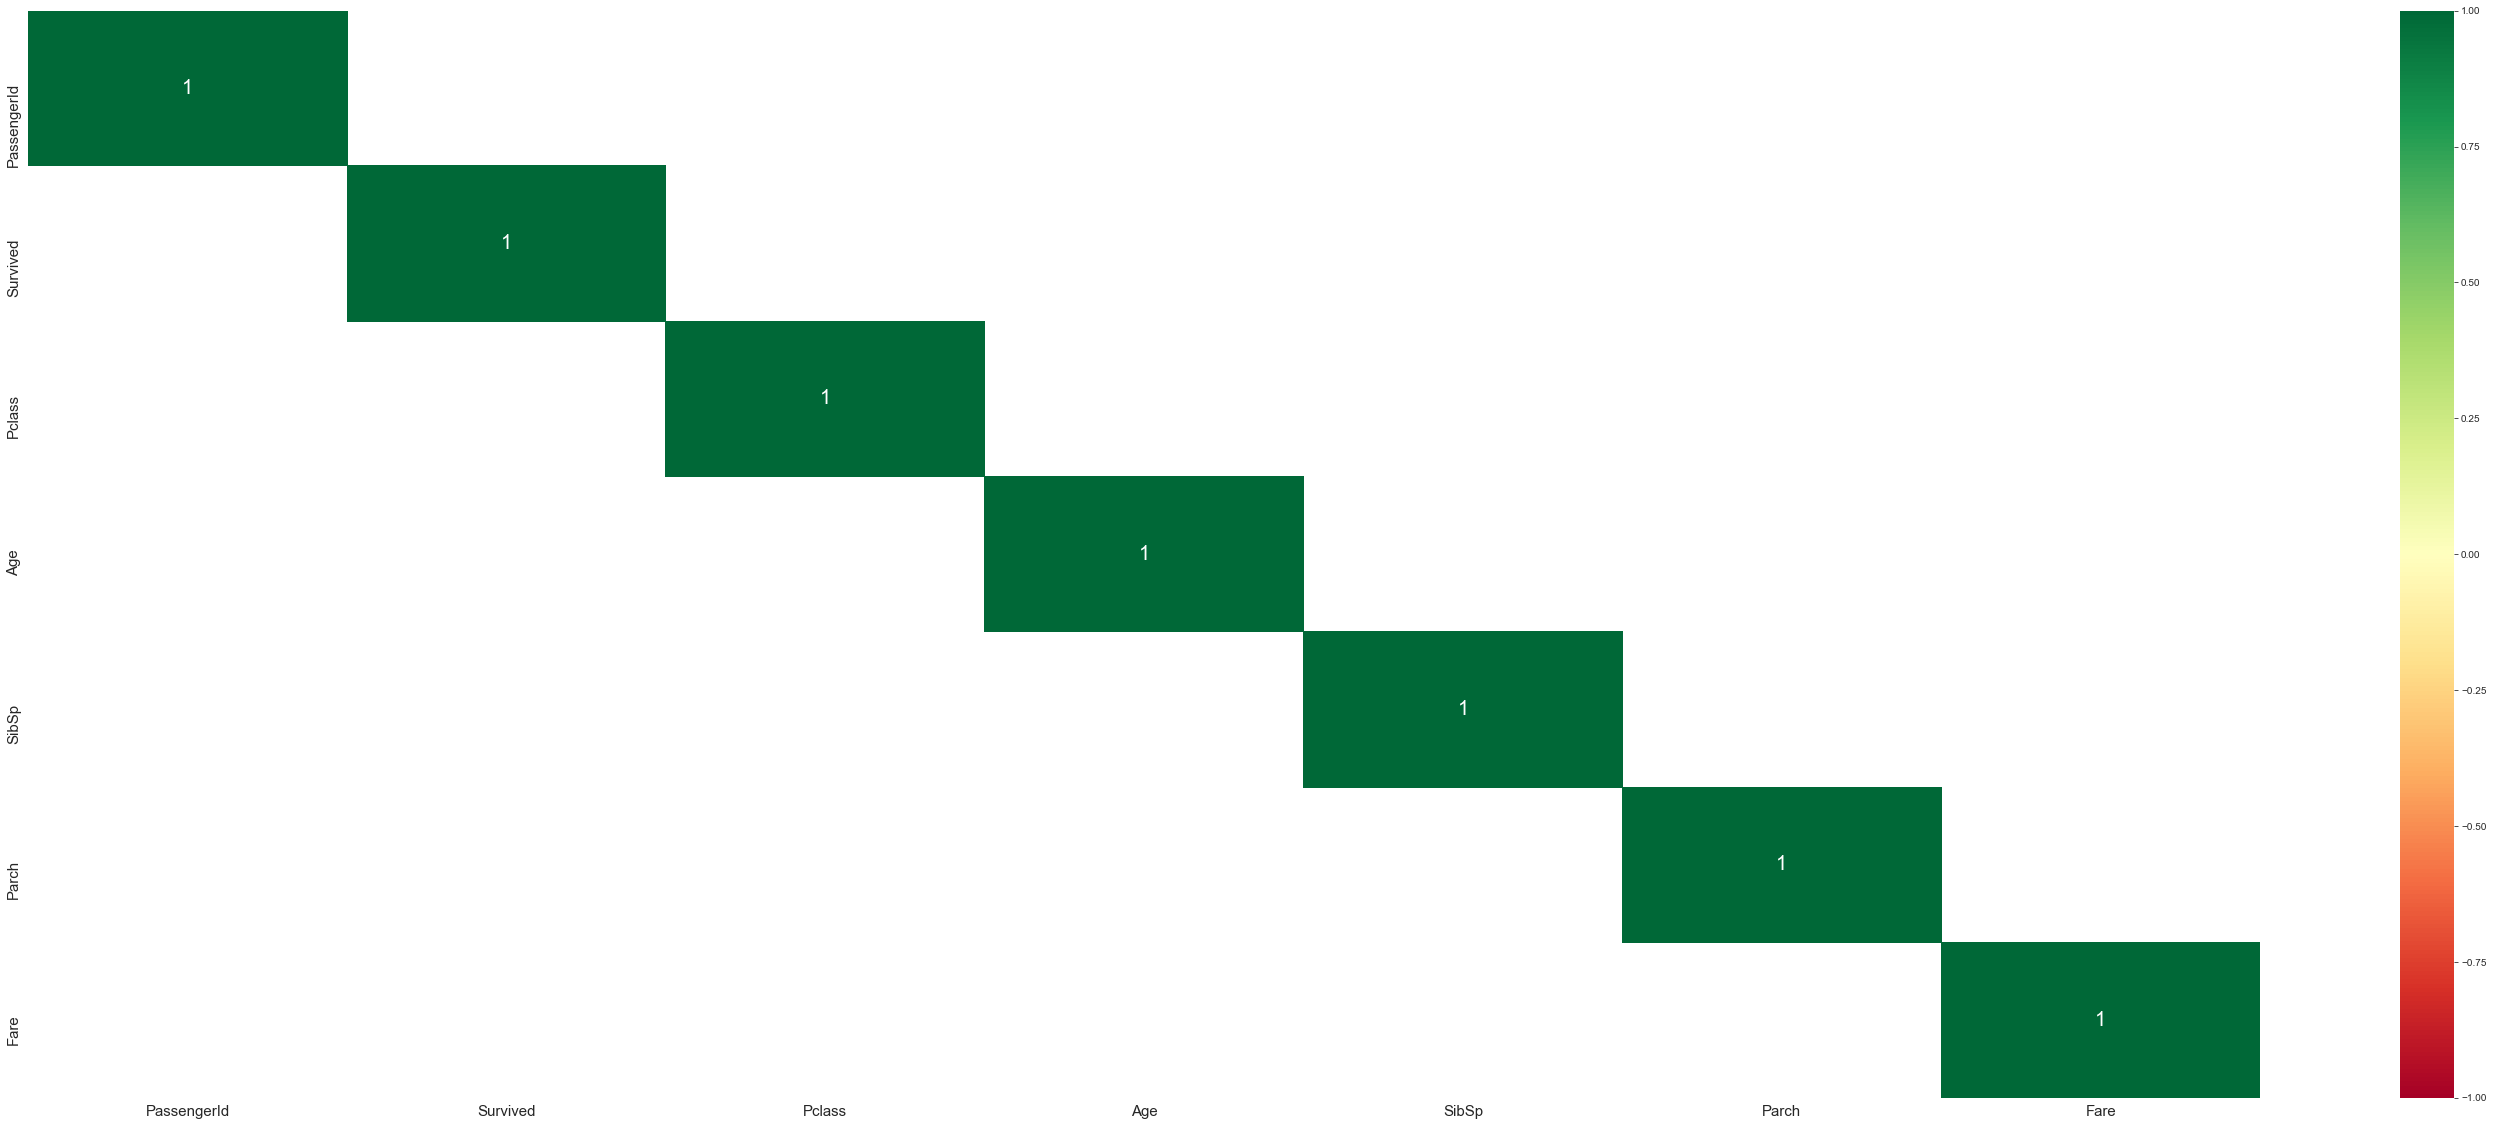

In [25]:
# set figure size
plt.figure(figsize=(50, 20))

# plot the heat map
# corr: give the correlation matrix
# pass the condition to get the strong correlation between the variables
# cmap: color code used for plotting
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
#sns.set(font_scale=2)
sns.heatmap(corr[(corr >= 0.7) | (corr <= -0.7)], cmap = 'RdYlGn', vmax = 1.0, vmin = -1.0, annot = True, 
            annot_kws={"size": 20})

# set the size of x and y axes labels
# set text size using 'fontsize'
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# display the plot
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the above heatmaps, it can seen that the continuous variables are not highly correlated with each other since all the correlation coefficients are less than close to 0.5. The maximum positive correlation is 0.41 between 'parch' and 'subsip'(which are not to be included in the model).It can be concluded that there is no multicollinearity in the data.<br><br>
Note: The diagonal values are always 1 because it is the correlation of the variable with itself.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
test[['PassengerId','Survived']].to_csv("./submission-1.csv",index=False)